In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import networkx as nx
import random
from pyswarm import pso

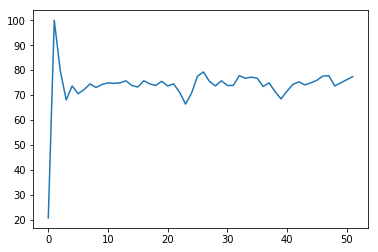

In [8]:
def sis(G,p,q,num_infected):
    n = nx.number_of_nodes(G)
    I = np.unique(np.random.choice(range(n), num_infected, replace=False))
    A = np.array(nx.to_numpy_matrix(G))
    S = np.unique(np.delete(np.arange(n),I))
    S1 = np.array([])
    numberofI = np.array([num_infected])
    for i in range(51):# google trend
        if len(S1) == 0:
            prob = np.triu((np.random.rand(n,n)), 1)
            prob = np.mat(prob + prob.T)
            B = A+0 # this matrix is adjacency matrix for nodes in I with their neighbours
            B[S.astype(int),:] = 0  #row's indexes are infected nodes, columns are susceptible or recover
            B[:,I.astype(int)] = 0
            prob_infected = np.array(B)*np.array(prob) # entries shows the probability theyre infected
            infct = 1*(prob_infected>1-p)
            newly_infected = np.array(np.where(np.sum(infct,axis=0)>0)[0])
            I1 = np.unique(np.concatenate((np.array(I),newly_infected),axis = None)) #infected for temp before - R
            S = np.delete(np.arange(n),I1)
    #this is done for Infected nodes, infecting their neighbors
    #next, is infected nodes that recover
    #we create a 1 Dimensional array with the number of entries the same as no of infected (updated)
    #the input for this array is random number from 0 to 1
    #when it exceeds q, the node is recovered and no longer infecting others
            recover_array = np.random.rand(I.size)
            S1 = I[(recover_array>1-q)]
            I = np.array(list(set(I1.tolist()) - set(S1.tolist())))
            S = np.unique(np.concatenate((S1,S)))
            numberofI = np.append(numberofI,I.size)
        else:
            prob = np.triu((np.random.rand(n,n)), 1)
            prob = np.mat(prob + prob.T)
            B = A+0 # this matrix is adjacency matrix for nodes in I with their neighbours
            B[S.astype(int),:] = 0 #row's indexes are infected nodes, columns are susceptible or recover
            B[:,I.astype(int)] = 0
            B[S1.astype(int),:] = 0
            B[:,S1.astype(int)] = 0
            prob_infected = np.array(B)*np.array(prob) # entries shows the probability theyre infected
            infct = 1*(prob_infected>1-p)
            newly_infected = np.array(np.where(np.sum(infct,axis=0)>0)[0])
            I1 = np.unique(np.concatenate((np.array(I),newly_infected),axis = None)) #infected for temp before - R
            S = np.delete(np.arange(n),I1)
            recover_array = np.random.rand(I.size)
            S1 = I[(recover_array>1-q)]
            I = np.array(list(set(I1.tolist()) - set(S1.tolist())))
            S = np.unique(np.concatenate((S1,S)))
            numberofI = np.append(numberofI,I.size)
    normalized_I = (numberofI)/max(numberofI)*100
    return normalized_I

G = nx.random_graphs.powerlaw_cluster_graph(505, 22, 1) 
a = sis(G,1,0.2,100)
plt.plot(a)
plt.show()


PSO

In [7]:
G = nx.random_graphs.powerlaw_cluster_graph(303,22,1)
#29 days of FIFA world cup trend
google_trend = [67,
80,
80,
78,
63,
62,
79,
100,
89,
72,
79,
70,
71,
69,
61,
59,
85,
87,
71,
62,
74,
67,
67,
61,
60,
55,
56,
58,
58,
80,
72,
62,
58,
58,
77,
73,
65,
67,
61,
81,
90,
74,
66,
60,
61,
67,
57,
58,
57,
66,
84,
69]
print(len(google_trend))
def f(X):
    p = X[0]
    q = X[1]
    return np.sum(sis(G,p,q,int(0.67*303))-google_trend)**2

lb = [0, 0] # lower bounds for p and q
ub = [1, 1] # upper bounds for p and q

xopt, fopt = pso(f, lb, ub)

print("Minimum p,q = ", xopt)
print("error = ", fopt)
x = range(52)
a = sis(G,xopt[0],xopt[1],int(0.34*505))
plt.plot(x,a)
plt.plot(x,google_trend)
plt.plot(x,a,linestyle='--',marker='.',color='red',label='SIS Simulation')
plt.plot(x,google_trend,marker='.',color='blue',label='Google Trend Data')
plt.xlabel("Day(s) Passed")
plt.ylabel('Number of people search for "Donald Trump"')
plt.legend()
plt.show()

52


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


KeyboardInterrupt: 